In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
pd.options.display.max_rows = 30


df = pd.read_csv("/Users/Hegstrom/Desktop/HCT390_assignment_ACO_data_file.csv", thousands=',')

# Getting everything loaded up, and setting up the dataframe.

# Question #1

#### Are physician-led or hospital-managed ACOs more likely to perform better with respect to their overall savings rate? Do you think the difference is meaningful? Hint: One way to do this is to calculate the average savings rate and standard deviation between the two types of ACOs. Then use the means, standard deviation, and a chart to answer this question.

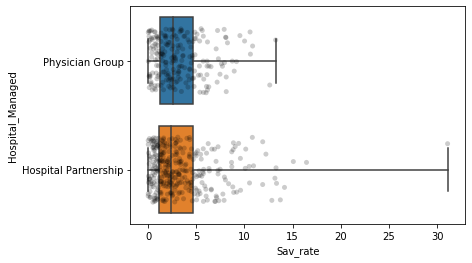

In [2]:
# Here, I'm making the savings rate into a percentage. This isn't necessary, I just like the formatting.
df['Sav_rate'] = df['Sav_rate']*100 

# This maps the underlying binary varaible into a human readable format.
hospital_physician_binary = {
    0: 'Physician Group',
    1: 'Hospital Partnership'
}
# Applying the data transformation to the hospital managed column.
df['Hospital_Managed'] = df['Hospital_Managed'].map(hospital_physician_binary)

# Alright, let's create a plot.
ax = sns.boxplot(x=df['Sav_rate'], y=df['Hospital_Managed'], whis=np.inf)
ax = sns.stripplot(x=df['Sav_rate'], y=df['Hospital_Managed'], color="0", jitter=.3, alpha=0.2)

The chart above is a combination boxplot and strip plot. The boxplot makes it easy to see the average, and interquartile ranges are basically the same. The mostly transparent dots are the individual data points. I like this because it shows there is a single hospital partnership group that has a VERY high savings rate. Almost twice any other. They're an outlier. Let's remove them for now.

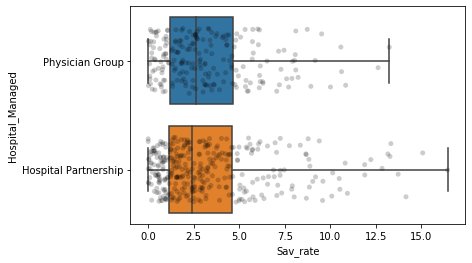

In [3]:
# Keep all of the data with a savings rate less than 30:
outlier_removed_df = df[df['Sav_rate'] < 30]

#Plot, again.
ax = sns.boxplot(x=outlier_removed_df['Sav_rate'], y=outlier_removed_df['Hospital_Managed'], whis=np.inf)
ax = sns.stripplot(x=outlier_removed_df['Sav_rate'], y=outlier_removed_df['Hospital_Managed'], color="0", jitter=.3, alpha=0.2)

Now we get to zoom in a little bit. From this graph, it's pretty clear there is no significant difference between the two groups. To be scientific, let's run a T-Test.

In [4]:
#In order to do a T-Test, we need to split the groups into two seperate arrays, and pass it to another function.
phys_group = df[df['Hospital_Managed'] == "Physician Group"]['Sav_rate'].values
hosp_group = df[df['Hospital_Managed'] == "Hospital Partnership"]['Sav_rate'].values
t, p = stats.ttest_ind(phys_group, hosp_group)
print('T-Score: {}'.format(t))
print('p-value: {}'.format(p))

T-Score: -0.579904503622566
p-value: 0.5622182327297058


This shows there is a non-significant p-value for the observed groups, meaning that the difference between the two is likely due to chance, and chance alone.
#### So, there is likely no difference in the savings rate between physician lead groups, or hospital partnerships.

# Question #2
#### Are physician-led or hospital-managed ACOs more likely to perform better with respect to ACO quality measures? Based on the four categories of ACO quality, on which categories do physician-led ACOs outperform hospital-managed ACOs?

In [5]:
# First, let's map the ACO columns to categories.
# All of these are from appendix A
# in the quality benchmark guideline PDF.

patient_caregiver_columns = ['ACO1','ACO2','ACO3','ACO4','ACO5',
                             'ACO6','ACO7','ACO34']

care_coordination_patient_safety_columns = ['ACO8', 'ACO35', 'ACO36',
                                            'ACO37', 'ACO38', 'ACO43',
                                           'ACO11', 'ACO12', 'ACO13', 'ACO44']

preventative_health_columns = ['ACO14', 'ACO15', 'ACO16', 'ACO17',
                              'ACO18', 'ACO19', 'ACO20', 'ACO42']

at_risk_depression_column = ['ACO40']

at_risk_dm_columns = ['ACO27', 'ACO41', 'DM_Comp']

at_risk_htn_column = ['ACO28']

at_risk_ischemic_vasc_column = ['ACO30']

In [6]:
# First, let's check the data type of the ACO columns for patient_caregiver
df[patient_caregiver_columns].dtypes

ACO1     float64
ACO2     float64
ACO3     float64
ACO4     float64
ACO5     float64
ACO6     float64
ACO7     float64
ACO34    float64
dtype: object

They're all floats, which is perfect. This means they are all numerical. If there was a "N/A", "-" or some other strange character, it could cause problems later. Additionally, I want to check some basics.

In [7]:
np.round(df[patient_caregiver_columns].describe(), 2)

,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34
count,548.00,548.00,548.00,548.00,548.00,548.00,548.00,548.00
mean,86.24,93.77,92.27,81.88,58.99,61.91,72.98,26.96
std,3.30,1.64,1.68,2.82,4.36,3.74,2.45,4.42
min,71.89,75.60,78.69,70.27,45.22,50.59,51.94,13.29
25%,84.62,92.97,91.45,80.13,55.87,59.61,71.75,23.97
50%,86.82,93.98,92.44,82.03,59.05,61.84,73.21,27.06
75%,88.46,94.71,93.29,83.72,62.12,64.10,74.56,29.92
max,94.21,97.27,96.22,89.03,73.48,73.53,79.62,40.58


There are 548 rows across all of the measurments. The mins are reasonable numbers, and the max is also a real number. This means there is not a 99999 or 000000 entered. Who knew data cleaning was the biggest part of data analysis?

The next question to understand, is to make sure that a positive number = better result. The appendix shows 7 columns where the opposite is true. None of which are in this analysis.

In [8]:
# Okay, let's splice the larger dataframe into a small subset we
# want to work with.
patient_caregiver_df = df[['Hospital_Managed'] + patient_caregiver_columns]
patient_caregiver_df

,Hospital_Managed,ACO1,ACO2,ACO3,ACO4,ACO5,ACO6,ACO7,ACO34
0,Physician Group,88.38,94.65,93.80,81.06,59.98,63.36,74.90,24.99
1,Physician Group,82.75,91.99,91.63,83.03,59.14,59.89,72.00,26.35
2,Hospital Partnership,86.73,93.88,94.31,80.33,65.65,62.33,73.72,26.82
3,Hospital Partnership,89.35,95.54,94.88,81.99,64.33,67.64,74.26,23.96
4,Hospital Partnership,87.15,94.51,94.27,85.77,59.74,63.42,72.64,26.02
5,Hospital Partnership,82.05,75.60,78.69,84.99,57.73,60.69,53.58,21.25
6,Physician Group,85.45,92.87,90.60,77.55,66.98,63.02,76.02,18.34
7,Physician Group,87.69,93.49,93.26,80.99,58.62,64.87,75.24,25.42
8,Hospital Partnership,86.06,93.21,91.96,81.37,58.62,57.60,74.81,23.05
9,Physician Group,88.20,93.87,92.65,85.34,58.95,63.31,71.27,24.81


In [9]:
# It's nice to start with a mean, standard deviation, and count to get a better undestanding.

patient_caregiver_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO1  mean                   86.108872        86.439479
      std                     3.406356         3.106757
      median                 86.770000        86.960000
ACO2  mean                   93.739199        93.826066
      std                     1.746971         1.441169
      median                 93.970000        94.010000
ACO3  mean                   92.227181        92.349052
      std                     1.728104         1.590250
      median                 92.420000        92.480000
ACO4  mean                   81.982730        81.706825
      std                     2.873216         2.722220
      median                 82.060000        81.910000
ACO5  mean                   58.789614        59.306872
      std                     4.457619         4.197678
      median                 58.680000        59.210000
ACO6  mean                   61.722374        62.205166
      std                     3.720573         3.764046
      median                 61.670000        61.980000
ACO7  mean                   72.966677        73.001469
      std                     2.563921         2.261088
      median                 73.240000        73.140000
ACO34 mean                   27.055193        26.809052
      std                     4.413194         4.434220
      median                 27.270000        26.520000

There are some differences, but nothing stands out as being hugely different to me. Let's create some charts.

In [10]:
# In order to create the charts all on one chart, seaborn, the plotting library, requires it to be stacked.
# This is kinda hard to follow, because it's a bit hack-ey. So look at the output below.
patient_caregiver_df = patient_caregiver_df.set_index('Hospital_Managed').unstack()
patient_caregiver_df = patient_caregiver_df.reset_index()
patient_caregiver_df.columns = ['ACO', 'Hospital Managed', 'Score']
patient_caregiver_df

,ACO,Hospital Managed,Score
0,ACO1,Physician Group,88.38
1,ACO1,Physician Group,82.75
2,ACO1,Hospital Partnership,86.73
3,ACO1,Hospital Partnership,89.35
4,ACO1,Hospital Partnership,87.15
5,ACO1,Hospital Partnership,82.05
6,ACO1,Physician Group,85.45
7,ACO1,Physician Group,87.69
8,ACO1,Hospital Partnership,86.06
9,ACO1,Physician Group,88.20


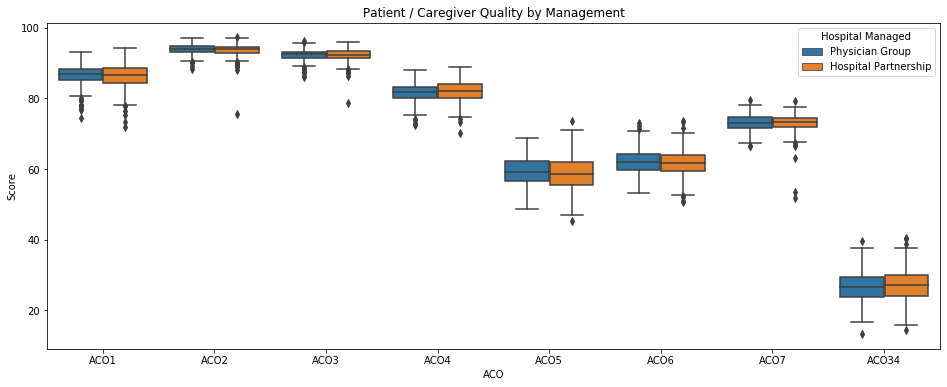

In [11]:
plt.figure(figsize=(16, 6))
plt.title('Patient / Caregiver Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=patient_caregiver_df, orient='v')

I don't see any huge difference in the patient / caregiver values between physician groups and hospital groups.

Moving on to care coordiation / patient safety metrics:

In [12]:
print(df[care_coordination_patient_safety_columns].dtypes)
print()
np.round(df[care_coordination_patient_safety_columns].describe(), 2)

ACO8     float64
ACO35    float64
ACO36    float64
ACO37    float64
ACO38    float64
ACO43    float64
ACO11    float64
ACO12    float64
ACO13    float64
ACO44    float64
dtype: object



,ACO8,ACO35,ACO36,ACO37,ACO38,ACO43,ACO11,ACO12,ACO13,ACO44
count,548.00,548.00,548.00,548.00,548.00,548.00,548.00,536.00,546.00,548.00
mean,14.98,18.59,37.05,76.77,59.05,1.98,98.18,85.97,79.65,64.36
std,0.49,1.06,4.93,9.60,7.03,0.38,4.04,16.60,15.15,13.60
min,13.47,15.12,21.31,49.31,34.88,1.00,59.24,1.23,5.01,0.00
25%,14.66,17.89,33.79,70.71,54.58,1.71,98.25,79.66,71.76,57.89
50%,14.96,18.53,36.76,76.45,58.94,1.94,99.78,92.88,83.10,65.07
75%,15.30,19.31,39.81,82.71,63.49,2.22,100.00,97.84,90.90,71.89
max,16.67,21.49,59.75,119.18,86.80,3.33,100.00,100.00,100.00,100.00


ACO12, medication reconiliation, has ~12 organizations with no score. Of note, a number of ACO metrics has an inversed score -> lower = better. ACO8, 35, 36, 37, 38, and 43 are all inversed.

In [13]:
#Splicing the data, and creating some descriptive statistics, again.
care_coordination_patient_safety_df = df[['Hospital_Managed'] + care_coordination_patient_safety_columns]
care_coordination_patient_safety_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO8  mean                   14.972315        14.981991
      std                     0.505429         0.468784
      median                 14.950000        14.980000
ACO35 mean                   18.619466        18.541754
      std                     1.059657         1.061496
      median                 18.590000        18.490000
ACO36 mean                   37.043620        37.055308
      std                     4.879906         5.013065
      median                 36.610000        37.070000
ACO37 mean                   76.915252        76.546398
      std                     9.682524         9.475109
      median                 76.450000        76.450000
ACO38 mean                   59.086736        58.986256
      std                     7.055150         7.013317
      median                 58.780000        59.090000
ACO43 mean                    1.982611         1.977441
      std                     0.383140         0.374330
      median                  1.930000         1.970000
ACO11 mean                   98.253680        98.062322
      std                     3.741166         4.483979
      median                 99.830000        99.690000
ACO12 mean                   85.366084        86.960980
      std                    17.334767        15.320190
      median                 92.490000        93.010000
ACO13 mean                   78.863631        80.905714
      std                    15.890227        13.815339
      median                 82.720000        84.120000
ACO44 mean                   64.462463        64.204787
      std                    12.872016        14.715934
      median                 65.220000        65.060000

Again, for the care coordination and patient safety benchmarks, there doesn't seem to be any obvious differences.
Let's create some charts, again.

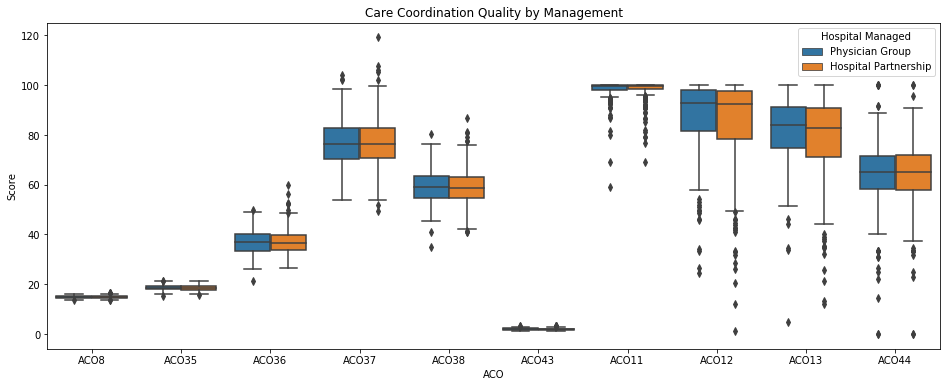

In [14]:
care_coordination_patient_safety_df = care_coordination_patient_safety_df.set_index('Hospital_Managed').unstack()
care_coordination_patient_safety_df = care_coordination_patient_safety_df.reset_index()
care_coordination_patient_safety_df.columns = ['ACO', 'Hospital Managed', 'Score']
plt.figure(figsize=(16, 6))
plt.title('Care Coordination Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=care_coordination_patient_safety_df, orient='v')

This shows that for nearly all the benchmarks, the averages appear the same. The ranges seem to var quite a bit, which is interesting.

Moving on to preventative health metrics:

In [15]:
print(df[preventative_health_columns].dtypes)
print()
np.round(df[preventative_health_columns].describe(), 2)

ACO14    float64
ACO15    float64
ACO16    float64
ACO17    float64
ACO18    float64
ACO19    float64
ACO20    float64
ACO42    float64
dtype: object



,ACO14,ACO15,ACO16,ACO17,ACO18,ACO19,ACO20,ACO42
count,546.00,546.00,546.00,546.00,546.00,545.00,545.00,546.00
mean,72.68,75.90,76.73,72.84,66.60,68.21,71.94,81.46
std,12.13,12.98,14.28,18.89,17.97,11.93,10.34,6.93
min,25.67,24.66,21.84,11.11,0.00,22.22,19.76,23.45
25%,66.74,70.09,68.43,60.35,55.59,61.45,66.12,78.52
50%,73.24,78.68,78.80,76.47,68.84,70.11,72.77,82.26
75%,80.81,85.65,87.28,87.95,80.84,76.21,79.92,85.36
max,99.04,98.15,100.00,100.00,100.00,99.83,93.19,99.78


For the preventative health metrics, ACO19 and ACO20 are missing for one of the organizations.

In [16]:
#Splicing the data, and creating some descriptive statistics, again.
preventative_health_df = df[['Hospital_Managed'] + preventative_health_columns]
preventative_health_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO14 mean                   72.281994        73.315381
      std                    11.935123        12.430050
      median                 72.105000        74.200000
ACO15 mean                   76.011637        75.729238
      std                    13.187240        12.683212
      median                 79.145000        78.285000
ACO16 mean                   76.117440        77.720857
      std                    14.810238        13.357512
      median                 77.990000        80.165000
ACO17 mean                   71.716696        74.627000
      std                    19.264152        18.166501
      median                 75.860000        77.675000
ACO18 mean                   65.829940        67.844286
      std                    18.156133        17.641412
      median                 67.830000        70.570000
ACO19 mean                   67.872478        68.753619
      std                    11.656245        12.367221
      median                 69.480000        70.280000
ACO20 mean                   71.970090        71.884810
      std                    10.405914        10.248592
      median                 73.140000        72.595000
ACO42 mean                   81.403750        81.562952
      std                     7.293616         6.319719
      median                 82.320000        82.050000

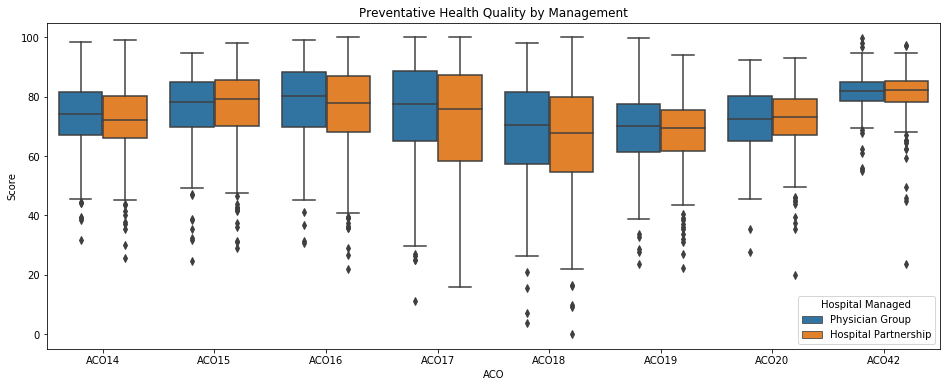

In [17]:
preventative_health_df = preventative_health_df.set_index('Hospital_Managed').unstack()
preventative_health_df = preventative_health_df.reset_index()
preventative_health_df.columns = ['ACO', 'Hospital Managed', 'Score']
plt.figure(figsize=(16, 6))
plt.title('Preventative Health Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=preventative_health_df, orient='v')

Again, the average scores appear to be mostly the same. There's some more variation around ACO17.

Now moving on to the "At risk" categories. They're getting combined to speed up this analysis.

In [18]:
#For the last few metrics, I'm going to group them into one dataframe.
at_risk_columns = at_risk_depression_column + at_risk_dm_columns + at_risk_htn_column + at_risk_ischemic_vasc_column

print(df[at_risk_columns].dtypes)
print()
np.round(df[at_risk_columns].describe(), 2)

ACO40      float64
ACO27      float64
ACO41      float64
DM_Comp    float64
ACO28      float64
ACO30      float64
dtype: object



,ACO40,ACO27,ACO41,DM_Comp,ACO28,ACO30
count,540.00,546.00,546.00,546.00,544.00,546.00
mean,8.82,15.52,52.38,46.76,73.12,88.90
std,10.89,6.92,15.22,14.52,7.46,7.60
min,0.00,5.36,0.00,0.00,2.82,33.99
25%,2.69,11.40,42.76,37.02,68.50,86.84
50%,6.34,14.37,52.80,47.03,73.07,90.73
75%,11.73,17.84,63.42,57.50,77.83,93.49
max,100.00,100.00,87.50,83.47,92.77,100.00


In [19]:
at_risk_df = df[['Hospital_Managed'] + at_risk_columns]
at_risk_df.groupby('Hospital_Managed').agg([np.mean, np.std, np.median]).T

Hospital_Managed  Hospital Partnership  Physician Group
ACO40   mean                  8.553994         9.255797
        std                  10.966985        10.766860
        median                6.120000         7.140000
ACO27   mean                 15.878095        14.938810
        std                   7.630098         5.580802
        median               14.390000        14.275000
ACO41   mean                 52.361280        52.415333
        std                  15.253749        15.212134
        median               51.640000        53.320000
DM_Comp mean                 46.628095        46.967952
        std                  14.521095        14.543890
        median               46.555000        47.655000
ACO28   mean                 72.864880        73.519667
        std                   7.967373         6.578970
        median               72.725000        73.840000
ACO30   mean                 88.771607        89.101095
        std                   7.842664         7.213944
        median               90.520000        91.070000

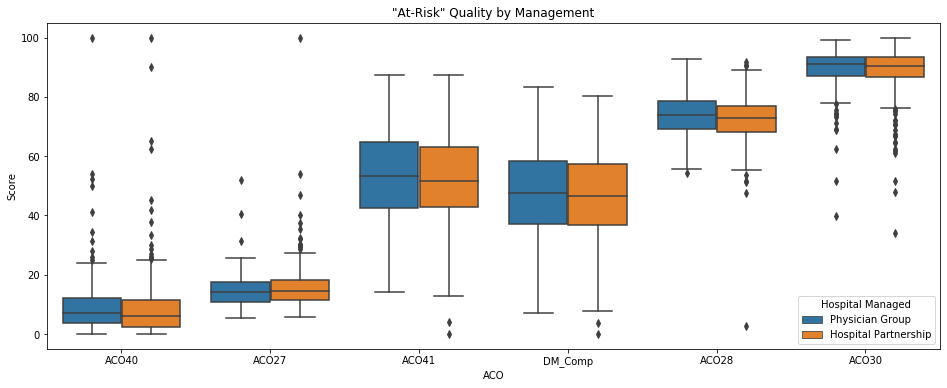

In [20]:
at_risk_df = at_risk_df.set_index('Hospital_Managed').unstack()
at_risk_df = at_risk_df.reset_index()
at_risk_df.columns = ['ACO', 'Hospital Managed', 'Score']
plt.figure(figsize=(16, 6))
plt.title('"At-Risk" Quality by Management')
ax = sns.boxplot(y="Score", x='ACO', hue="Hospital Managed",
                 data=at_risk_df, orient='v')

Some of these metrics appear a bit more intersting. ACO28, the control of HTN metric, has a significnatly reduced min for the physician group. Likewise, I'd want to look at the range for ACO27 in more detail.

But, to answer question #2, there does not appear to be a difference between physician lead or hospital partnership groups in terms of medicare quality metrics.

# Question #3

## Are there geographic variations in ACO performance, with respect to ACO savings? Which regions of the country perform better?

In [21]:
region_savings_pivot = df.groupby('Region').agg({'Sav_rate': [np.min, np.mean, np.max, np.median, len]})
region_savings_pivot.columns = ['Min', 'Mean', 'Max', 'Median', 'Count']
region_savings_pivot

,Min,Mean,Max,Median,Count
Region,,,,,
Midwest,0.003080,3.252223,15.077416,2.493829,129.0
Northeast,0.081187,3.706176,31.094562,2.557839,102.0
South,0.009720,3.407849,14.159549,2.576123,252.0
West,0.007320,3.031690,12.229850,2.267816,65.0


Just based on this quick pivot, there is a possibility there are some differences based on region. The Northest has a higher mean compared to the west.

Let's investigate by creating a graph.

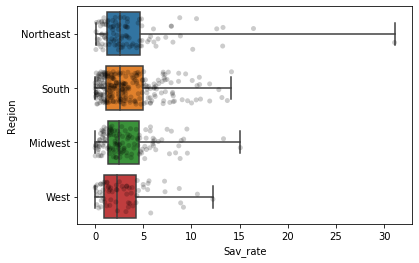

In [22]:
ax = sns.boxplot(x=df['Sav_rate'], y=df['Region'], whis=np.inf)
ax = sns.stripplot(x=df['Sav_rate'], y=df['Region'], color="0", jitter=.3, alpha=0.2)

Well, this makes the difference appear a bit less significant. The one institution with a tremendous savings rate is in the northeast. Let's drop them to look further.

In [23]:
# Again, keeping everyone with a savings rate less than 30.
region_df = df[df['Sav_rate'] < 30]

region_savings_pivot = region_df.groupby('Region').agg({'Sav_rate': [np.min, np.mean, np.max, np.median, len]})
region_savings_pivot.columns = ['Min', 'Mean', 'Max', 'Median', 'Count']
region_savings_pivot

,Min,Mean,Max,Median,Count
Region,,,,,
Midwest,0.003080,3.252223,15.077416,2.493829,129.0
Northeast,0.081187,3.435004,16.443580,2.510001,101.0
South,0.009720,3.407849,14.159549,2.576123,252.0
West,0.007320,3.031690,12.229850,2.267816,65.0


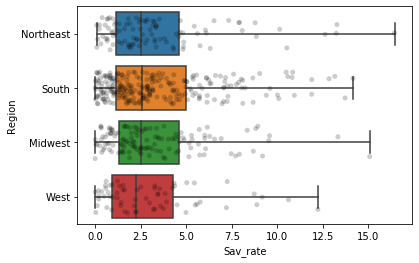

In [24]:
ax = sns.boxplot(x=region_df['Sav_rate'], y=region_df['Region'], whis=np.inf)
ax = sns.stripplot(x=region_df['Sav_rate'], y=region_df['Region'], color="0", jitter=.3, alpha=0.2)

With the outlier in the northeast removed, the differences among the regions doesn't appear as big.

So, to answer #3, there does not appear to be any significant difference between the regions. The West is slightly lower, but this will not reach statistical significance given the variation.

# Question #4

#### Evaluate the performance of the ACOs based on their track of choice. Do ACOs in a two-sided track (either Tracks 1+, 2 or 3) outperform ACOs in one-sided track (Track 1)? If so, along which dimensions of cost and quality do the two types of ACOs differ?

In [25]:
#Alright, let's splice a new dataframe to answer this question.

track_df = df[['Current_Track_1', 'Current_Track_2', 'Current_Track_3', 'Current_Track_1_Plus']]
track_df

,Current_Track_1,Current_Track_2,Current_Track_3,Current_Track_1_Plus
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,0,0,1,0
9,1,0,0,0


Let's test our data to make sure thing's are classified correctly. Each row should only have one track, indicated by a boolean variable, which means each row should sum to 1. If it sums to 0, or >1, something is wrong.

In [26]:
track_df.sum(axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
543    1
544    1
545    1
546    1
547    1
Length: 548, dtype: int64

In [27]:
# Again, asking what are the unique values in the array above.
track_df.sum(axis=1).unique()

array([1])

There are only 1's present, indicating our data is not coded as two tracks. We have a clean dataset. Nice!

In [28]:
# Let's make our data easier to read. Note, I'm doing this is the original dataframe, not the newly spliced one.
# This means I'll need to bring in the new column.
track_classification = {
    0: 'Two Sided Track',
    1: 'One Sided Track'
}

df['Organization Track'] = df['Current_Track_1'].map(track_classification)
df['Organization Track']

0      One Sided Track
1      One Sided Track
2      One Sided Track
3      Two Sided Track
4      One Sided Track
            ...       
543    One Sided Track
544    Two Sided Track
545    One Sided Track
546    One Sided Track
547    One Sided Track
Name: Organization Track, Length: 548, dtype: object

In [29]:
track_df = df[['Sav_rate', 'Organization Track']]
track_df

,Sav_rate,Organization Track
0,5.616420,One Sided Track
1,1.443776,One Sided Track
2,2.413121,One Sided Track
3,1.842536,Two Sided Track
4,1.606157,One Sided Track
5,3.808819,One Sided Track
6,3.018397,One Sided Track
7,1.907360,One Sided Track
8,3.912506,Two Sided Track
9,3.103871,One Sided Track


In [30]:
track_savings_pivot = track_df.groupby('Organization Track').agg({'Sav_rate': [np.min, np.mean, np.max, np.median, len]})
track_savings_pivot.columns = ['Min', 'Mean', 'Max', 'Median', 'Count']
track_savings_pivot

,Min,Mean,Max,Median,Count
Organization Track,,,,,
One Sided Track,0.00308,3.439656,31.094562,2.517202,453.0
Two Sided Track,0.00732,3.107790,10.583065,2.422774,95.0


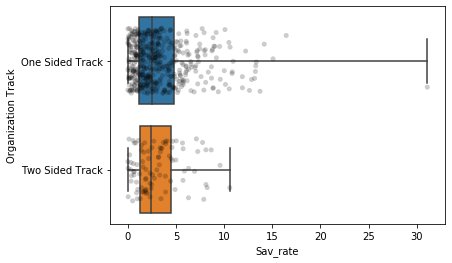

In [31]:
ax = sns.boxplot(x=track_df['Sav_rate'], y=track_df['Organization Track'], whis=np.inf)
ax = sns.stripplot(x=track_df['Sav_rate'], y=track_df['Organization Track'], color="0", jitter=.3, alpha=0.2)

There again appears to be a lot of similarity between the tracks. Though, we again have the outlier problem...

In [32]:
track_df = track_df[track_df['Sav_rate'] < 30]

track_savings_pivot = track_df.groupby('Organization Track').agg({'Sav_rate': [np.min, np.mean, np.max, np.median, len]})
track_savings_pivot.columns = ['Min', 'Mean', 'Max', 'Median', 'Count']
track_savings_pivot

,Min,Mean,Max,Median,Count
Organization Track,,,,,
One Sided Track,0.00308,3.378473,16.443580,2.514851,452.0
Two Sided Track,0.00732,3.107790,10.583065,2.422774,95.0


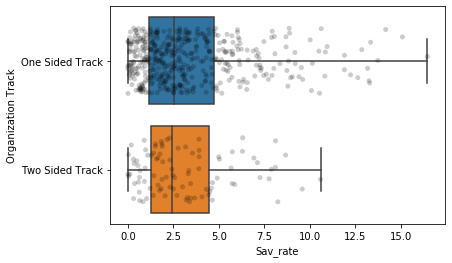

In [33]:
ax = sns.boxplot(x=track_df['Sav_rate'], y=track_df['Organization Track'], whis=np.inf)
ax = sns.stripplot(x=track_df['Sav_rate'], y=track_df['Organization Track'], color="0", jitter=.3, alpha=0.2)

Okay, so there are certainly a lot more one sided tracks than there are two sided. The average savings rate appears to have a statistically non-significant difference based on the variation. The maximum savings rate achieved in the two sided track is less than the groups in the one sided track.

So, savings doesn't appear to be all that different. Let's look at quality.

In [34]:
# We'll start by looking at the patient / caregiver metrics.
#The code to do this analysis is nearly identical to question 3.

patient_caregiver_df = df[['Organization Track'] + patient_caregiver_columns]
patient_caregiver_df.groupby('Organization Track').agg([np.mean, np.std, np.median]).T

Organization Track  One Sided Track  Two Sided Track
ACO1  mean                86.269073        86.079263
      std                  3.294796         3.310506
      median              86.900000        86.350000
ACO2  mean                93.757395        93.845368
      std                  1.688045         1.360550
      median              94.020000        93.900000
ACO3  mean                92.231391        92.477789
      std                  1.688186         1.609321
      median              92.420000        92.520000
ACO4  mean                81.904150        81.744632
      std                  2.812392         2.848609
      median              82.040000        82.020000
ACO5  mean                58.768675        60.038316
      std                  4.271934         4.654143
      median              58.720000        60.470000
ACO6  mean                61.900486        61.945368
      std                  3.749666         3.720832
      median              61.890000        61.710000
ACO7  mean                72.950199        73.122526
      std                  2.471466         2.350490
      median              73.190000        73.350000
ACO34 mean                26.991501        26.812211
      std                  4.416637         4.449996
      median              27.170000        26.520000

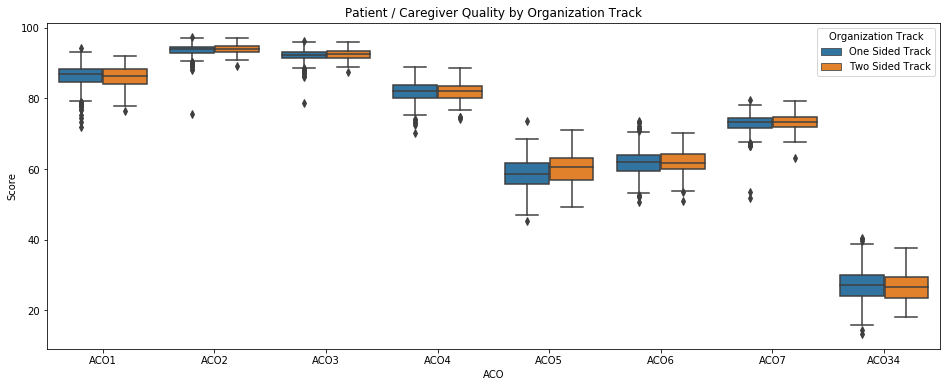

In [35]:
patient_caregiver_df = patient_caregiver_df.set_index('Organization Track').unstack()
patient_caregiver_df = patient_caregiver_df.reset_index()
patient_caregiver_df.columns = ['ACO', 'Organization Track', 'Score']
plt.figure(figsize=(16, 6))
plt.title('Patient / Caregiver Quality by Organization Track')
ax = sns.boxplot(y="Score", x='ACO', hue="Organization Track",
                 data=patient_caregiver_df, orient='v')

In [36]:
care_coordination_patient_safety_df = df[['Organization Track'] + care_coordination_patient_safety_columns]
care_coordination_patient_safety_df.groupby('Organization Track').agg([np.mean, np.std, np.median]).T

Organization Track  One Sided Track  Two Sided Track
ACO8  mean                14.964989        15.028737
      std                  0.484473         0.521716
      median              14.940000        15.190000
ACO35 mean                18.540795        18.822000
      std                  1.047796         1.092729
      median              18.490000        18.800000
ACO36 mean                37.247483        36.097474
      std                  5.028284         4.310742
      median              36.920000        35.970000
ACO37 mean                76.797550        76.657263
      std                  9.786044         8.680698
      median              76.280000        76.730000
ACO38 mean                59.093068        58.833368
      std                  7.167790         6.380782
      median              58.930000        59.120000
ACO43 mean                 2.003907         1.869579
      std                  0.388836         0.309361
      median               1.970000         1.830000
ACO11 mean                98.328057        97.474000
      std                  3.969694         4.314352
      median              99.880000        99.020000
ACO12 mean                85.685124        87.344839
      std                 16.797467        15.640858
      median              92.640000        93.640000
ACO13 mean                78.783473        83.811170
      std                 15.305660        13.677122
      median              82.480000        86.510000
ACO44 mean                64.503819        63.692947
      std                 13.251468        15.205649
      median              65.000000        65.450000

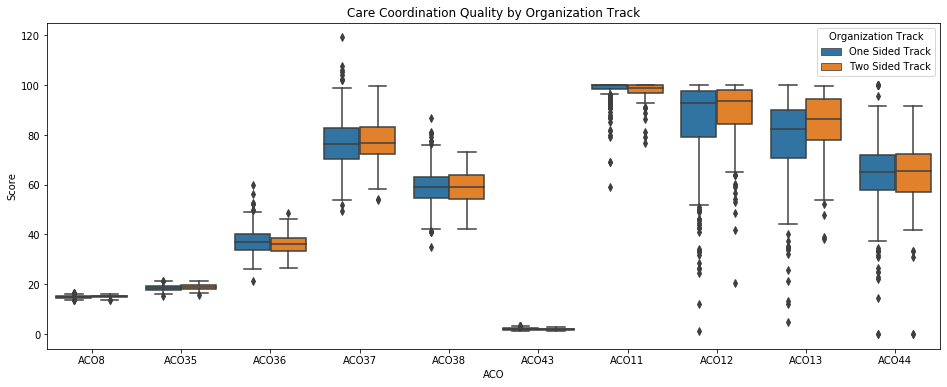

In [37]:
care_coordination_patient_safety_df = care_coordination_patient_safety_df.set_index('Organization Track').unstack()
care_coordination_patient_safety_df = care_coordination_patient_safety_df.reset_index()
care_coordination_patient_safety_df.columns = ['ACO', 'Organization Track', 'Score']
plt.figure(figsize=(16, 6))
plt.title('Care Coordination Quality by Organization Track')
ax = sns.boxplot(y="Score", x='ACO', hue="Organization Track",
                 data=care_coordination_patient_safety_df, orient='v')

In [38]:
preventative_health_df = df[['Organization Track'] + preventative_health_columns]
preventative_health_df.groupby('Organization Track').agg([np.mean, np.std, np.median]).T

Organization Track  One Sided Track  Two Sided Track
ACO14 mean                72.218075        74.897979
      std                 11.753306        13.634826
      median              72.140000        77.030000
ACO15 mean                75.155332        79.498298
      std                 12.703057        13.773871
      median              77.815000        83.485000
ACO16 mean                76.034159        80.100000
      std                 14.378252        13.351791
      median              77.495000        82.590000
ACO17 mean                72.719978        73.394149
      std                 18.775665        19.500686
      median              76.470000        76.555000
ACO18 mean                66.127898        68.897340
      std                 17.826453        18.573779
      median              68.055000        74.420000
ACO19 mean                67.439268        71.919468
      std                 11.772462        12.056792
      median              69.260000        73.925000
ACO20 mean                71.198714        75.480532
      std                 10.466523         8.918214
      median              72.280000        76.285000
ACO42 mean                81.364071        81.950213
      std                  6.939359         6.899376
      median              82.210000        82.565000

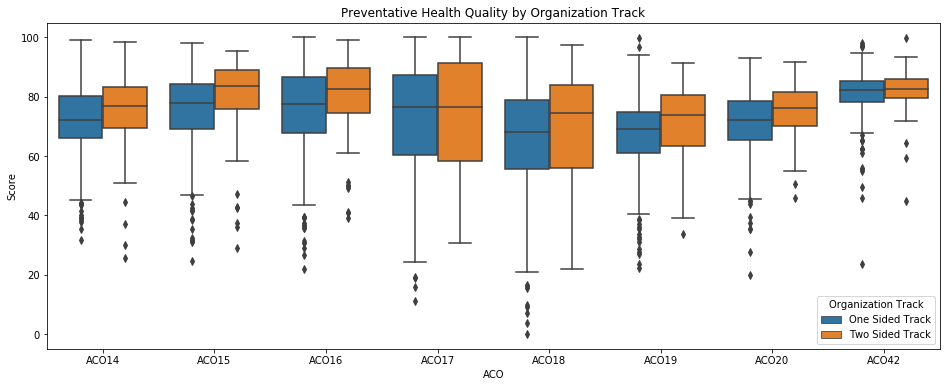

In [39]:
preventative_health_df = preventative_health_df.set_index('Organization Track').unstack()
preventative_health_df = preventative_health_df.reset_index()
preventative_health_df.columns = ['ACO', 'Organization Track', 'Score']
plt.figure(figsize=(16, 6))
plt.title('Preventative Health Quality by Organization Track')
ax = sns.boxplot(y="Score", x='ACO', hue="Organization Track",
                 data=preventative_health_df, orient='v')

In [40]:
at_risk_df = df[['Organization Track'] + at_risk_columns]
at_risk_df.groupby('Organization Track').agg([np.mean, np.std, np.median]).T

Organization Track  One Sided Track  Two Sided Track
ACO40   mean               8.642049         9.715934
        std               10.732128        11.636838
        median             6.150000         7.500000
ACO27   mean              15.875664        13.791383
        std                7.241971         4.791672
        median            14.715000        12.785000
ACO41   mean              51.532013        56.469574
        std               15.057023        15.438565
        median            51.565000        59.325000
DM_Comp mean              45.899867        50.889043
        std               14.315742        14.845904
        median            45.725000        53.615000
ACO28   mean              72.706933        75.083830
        std                7.497516         7.003141
        median            72.630000        74.665000
ACO30   mean              88.714004        89.784681
        std                7.857028         6.191245
        median            90.635000        91.080000

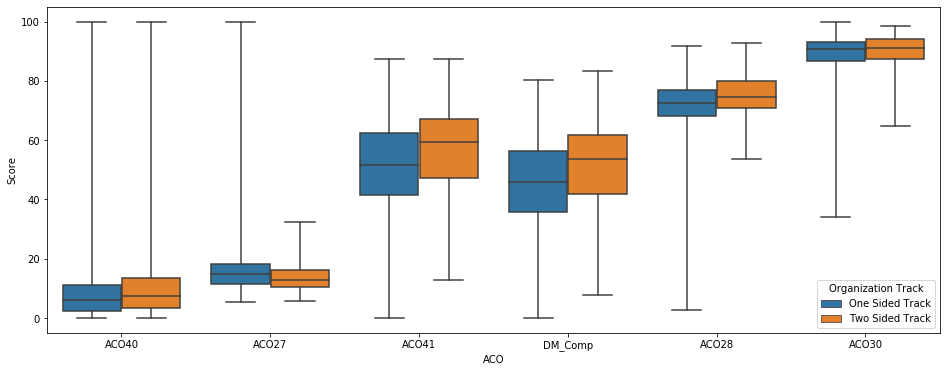

In [41]:
at_risk_df = at_risk_df.set_index('Organization Track').unstack()
at_risk_df = at_risk_df.reset_index()
at_risk_df.columns = ['ACO', 'Organization Track', 'Score']
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y="Score", x='ACO', hue="Organization Track",
                 data=at_risk_df, whis=np.inf, orient='v')

Hokay, that is a lot of graphs. There's a lot of individual outcomes. What if there is some way to reduce the number down to reduce the noise, while keeping the info clean? Enter, principal component analysis.

In [42]:
from sklearn.decomposition import PCA
pca_dataframe = df[['Organization Track'] + ['Hospital_Managed'] + patient_caregiver_columns + care_coordination_patient_safety_columns + preventative_health_columns + at_risk_columns]
pca_dataframe = pca_dataframe.set_index(['Organization Track', 'Hospital_Managed'])

# There are some missing values. This replaces the missing values, with the mean for that particular metric.
pca_dataframe = pca_dataframe.fillna(pca_dataframe.mean())
pca_dataframe



ACO1   ACO2   ACO3   ACO4   ACO5  \
Organization Track Hospital_Managed                                          
One Sided Track    Physician Group       88.38  94.65  93.80  81.06  59.98   
                   Physician Group       82.75  91.99  91.63  83.03  59.14   
                   Hospital Partnership  86.73  93.88  94.31  80.33  65.65   
Two Sided Track    Hospital Partnership  89.35  95.54  94.88  81.99  64.33   
One Sided Track    Hospital Partnership  87.15  94.51  94.27  85.77  59.74   
...                                        ...    ...    ...    ...    ...   
                   Physician Group       85.33  94.05  93.22  80.10  57.93   
Two Sided Track    Hospital Partnership  85.08  92.43  90.22  82.26  52.83   
One Sided Track    Hospital Partnership  87.82  94.53  92.72  83.14  62.47   
                   Hospital Partnership  81.96  92.64  91.31  80.77  62.52   
                   Hospital Partnership  81.10  91.70  90.40  78.84  53.43   

                                          ACO6   ACO7  ACO34   ACO8  ACO35  \
Organization Track Hospital_Managed                                          
One Sided Track    Physician Group       63.36  74.90  24.99  15.02  17.14   
                   Physician Group       59.89  72.00  26.35  14.93  18.39   
                   Hospital Partnership  62.33  73.72  26.82  15.54  19.43   
Two Sided Track    Hospital Partnership  67.64  74.26  23.96  14.74  18.34   
One Sided Track    Hospital Partnership  63.42  72.64  26.02  15.29  18.29   
...                                        ...    ...    ...    ...    ...   
                   Physician Group       62.50  79.62  26.07  15.44  18.82   
Two Sided Track    Hospital Partnership  64.04  70.85  31.20  14.96  18.10   
One Sided Track    Hospital Partnership  68.76  74.33  36.39  14.94  19.15   
                   Hospital Partnership  67.97  74.12  29.11  14.66  18.35   
                   Hospital Partnership  63.60  76.90  20.74  15.80  20.51   

                                         ...  ACO18  ACO19  ACO20  ACO42  \
Organization Track Hospital_Managed      ...                               
One Sided Track    Physician Group       ...  69.04  72.62  72.55  75.00   
                   Physician Group       ...  77.85  67.00  71.78  86.10   
                   Hospital Partnership  ...  43.15  72.29  75.99  83.70   
Two Sided Track    Hospital Partnership  ...  79.78  79.07  85.86  78.78   
One Sided Track    Hospital Partnership  ...  81.45  73.05  69.44  87.88   
...                                      ...    ...    ...    ...    ...   
                   Physician Group       ...  87.74  84.54  87.63  83.53   
Two Sided Track    Hospital Partnership  ...  27.65  60.16  73.60  76.17   
One Sided Track    Hospital Partnership  ...  63.67  69.76  72.69  77.46   
                   Hospital Partnership  ...  53.05  73.49  73.84  81.20   
                   Hospital Partnership  ...  48.39  78.00  63.71  71.61   

                                             ACO40  ACO27  ACO41  DM_Comp  \
Organization Track Hospital_Managed                                         
One Sided Track    Physician Group        7.500000  13.04  64.64    56.81   
                   Physician Group       13.110000  17.29  33.46    28.20   
                   Hospital Partnership   0.000000  20.97  57.26    47.18   
Two Sided Track    Hospital Partnership   5.560000   8.11  60.23    57.53   
One Sided Track    Hospital Partnership   9.090000   8.00  72.40    67.20   
...                                            ...    ...    ...      ...   
                   Physician Group        8.823019   9.95  71.14    64.68   
Two Sided Track    Hospital Partnership   0.000000  18.33  45.50    38.00   
One Sided Track    Hospital Partnership  13.430000  17.34  48.39    40.73   
                   Hospital Partnership   3.280000  13.64  57.27    52.00   
                   Hospital Partnership   0.000000  11.29  39.92    37.90   

                     

Text(0.5, 1.0, 'PCA - Hospital Managment')

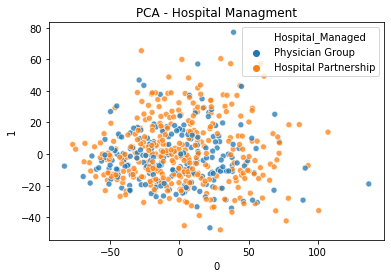

In [43]:
pca_obj = PCA(n_components=2)
output = pca_obj.fit_transform(pca_dataframe.values)
output_df = pd.DataFrame(output)

output_df.index = pca_dataframe.index.get_level_values(1)
output_df = output_df.reset_index()

ax = sns.scatterplot(data=output_df, x=0, y=1, hue='Hospital_Managed', alpha=.75)
plt.title('PCA - Hospital Managment')

Principal component analysis is kind of hard to explain in detail. There's math. Complicated math.

https://en.wikipedia.org/wiki/Principal_component_analysis
    
But, what you are looking at is a way to turn 32 columns into 2, reducing the dimensonality, but in a way that preserves the information.

What this scatter plot shows me is that there is a whole lot of overlap in the quality metrics from hospital management. They do not seperate into distinct groups. There's enough, that one probably could not build a classifier to accurately predict which track an organiation is in based on their quality data. And based on the management. Looking at the organization:

Text(0.5, 1.0, 'PCA - Organization Track')

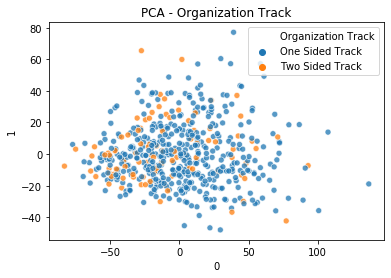

In [44]:
del output_df['Hospital_Managed']
output_df.index = pca_dataframe.index.get_level_values(0)
output_df = output_df.reset_index()
output_df
sns.scatterplot(data=output_df, x=0, y=1, hue='Organization Track', alpha=.75)
plt.title('PCA - Organization Track')

# Question #5

#### What are some other ACO characteristics that determine ACO savings rate? Choose three variables and look at the association of each with ACO savings and performance. For example, you might look at ACO tenure, patient demographic mix, or patient risk scores.

Text(0.5, 0, 'Years')

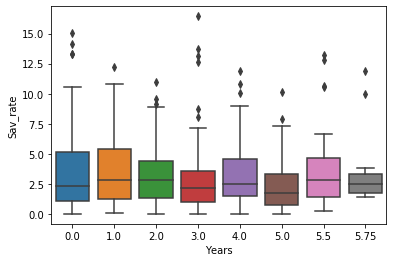

In [45]:
# Let's look at the years of experience the ACO has. Maybe it takes a little while before things kick in.
# Of note, I'm going to ax the one savings rate that's enormous permanently..

df = df[df['Sav_rate'] <30]
ax = sns.boxplot(x=df['Experience'], y=df['Sav_rate'])
plt.xlabel('Years')

Well, I guess the ACOs that were part of the initial group all have some savings... The min in the 5.75 year of experience group is higher than the others. Otherwise, there does not appear to be any significant trend.

Text(0.5, 0, 'Number of Beneficiaries')

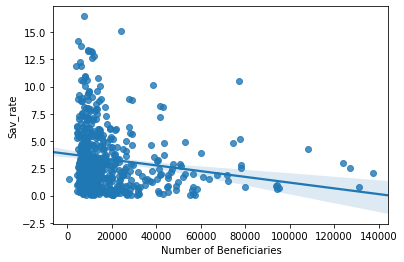

In [46]:
# Let's look at the number of beneficiaries. Perhaps smaller is better?
sns.regplot(data=df, y='Sav_rate', x='N_AB')
plt.xlabel('Number of Beneficiaries')

Hmmm, well there isn't a strong correlation. But, maybe there's something there. The regression drawn shows a downward sloping trend, indicating that less beneficiaries = higher savings.

Let's look at race.

In [47]:
df[['N_Ben_Race_White', 'N_Ben_Race_Black', 'N_Ben_Race_Asian', 'N_Ben_Race_Hisp', 'N_Ben_Race_Native', 'N_Ben_Race_Other']]

,N_Ben_Race_White,N_Ben_Race_Black,N_Ben_Race_Asian,N_Ben_Race_Hisp,N_Ben_Race_Native,N_Ben_Race_Other
0,26177,1134,402,108,7,1050
1,4850,2770,39,179,10,119
2,4561,4785,93,81,3,260
3,38290,1606,294,342,12,972
4,11623,1950,124,29,9,388
5,5285,986,47,50,8,49
6,20766,82,53,25,66,477
7,5875,407,63,161,7,196
8,7039,998,93,492,21,428
9,20676,967,194,213,641,381


In order to move 6 columns down to 1, let's create a new column that's percent non-white.

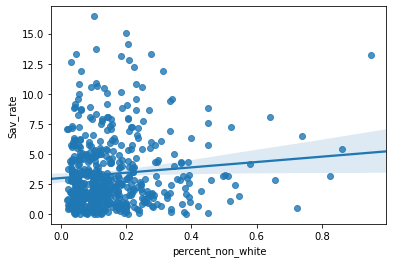

In [48]:
df['percent_white'] = df['N_Ben_Race_White'] / df[['N_Ben_Race_White', 'N_Ben_Race_Black', 'N_Ben_Race_Asian', 'N_Ben_Race_Hisp', 'N_Ben_Race_Native', 'N_Ben_Race_Other']].sum(axis=1)
df['percent_non_white'] = 1 - df['percent_white']

sns.regplot(data=df, x='percent_non_white', y='Sav_rate')

This shows that more non-white patients under the ACO correlates with a higher savings rate. The scatter plot again shows that the majority of the variation is unexplained, however.

# Question #6

#### What kinds of recommendations would you make for poorly performing ACOs? Thinking back on class discussion about platforms, do you see any connections to improving performance?

From the experiences we get to have as medical students, we can see directly what quality patient care looks like at the individual level. Zooming out to evaluate a whole population is kind of challenging. One can imagine that we have a skewed view, since our patients showed up the clinic, whereas those that are higher risk may never go until they arrive by ambulance. 

One question I wondered is if ACOs that are highly ranked in quality in one category are also highly ranked in other categories? Let's find out.

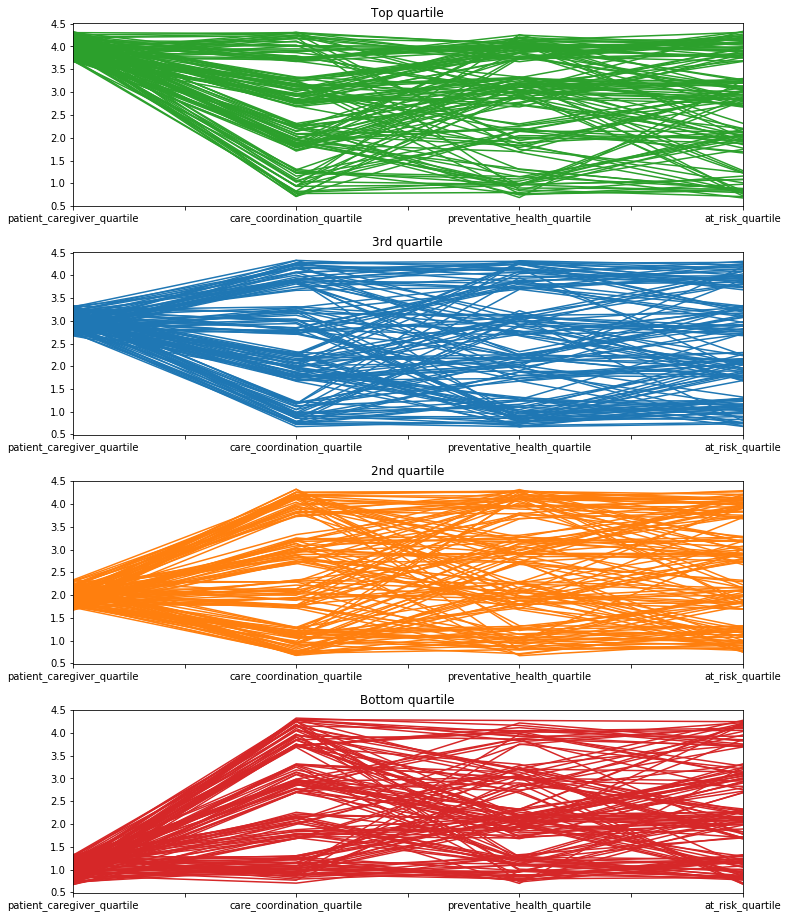

In [49]:
testing_ranking = df.copy()
# First, I'm inversing the scale, so everything is + = +.
testing_ranking['ACO8'] = 100 - testing_ranking['ACO8']
testing_ranking['ACO27'] = 100 - testing_ranking['ACO27']
testing_ranking['ACO35'] = 100 - testing_ranking['ACO35']
testing_ranking['ACO36'] = 100 - testing_ranking['ACO36']
testing_ranking['ACO37'] = 100 - testing_ranking['ACO37']
testing_ranking['ACO38'] = 100 - testing_ranking['ACO38']
testing_ranking['ACO43'] = 100 - testing_ranking['ACO43']


# This aggregates the scores for the categories for each organization.
testing_ranking['patient_caregiver_score'] = testing_ranking[patient_caregiver_columns].sum(axis=1)
testing_ranking['care_coordination_score'] = testing_ranking[care_coordination_patient_safety_columns].sum(axis=1)
testing_ranking['preventative_health_score'] = testing_ranking[preventative_health_columns].sum(axis=1)
testing_ranking['at_risk_score'] = testing_ranking[at_risk_depression_column + at_risk_dm_columns + at_risk_htn_column + at_risk_ischemic_vasc_column].sum(axis=1)

# This assigns their quartile rank in each quality category.
testing_ranking['patient_caregiver_quartile'] = pd.qcut(testing_ranking['patient_caregiver_score'], 4, labels=False) + 1
testing_ranking['care_coordination_quartile'] = pd.qcut(testing_ranking['care_coordination_score'], 4, labels=False) + 1
testing_ranking['preventative_health_quartile'] = pd.qcut(testing_ranking['preventative_health_score'], 4, labels=False) + 1
testing_ranking['at_risk_quartile'] = pd.qcut(testing_ranking['at_risk_score'], 4, labels=False) + 1

# And now we're slicing the data to only the categories needed.
testing_ranking = testing_ranking[['patient_caregiver_quartile', 'care_coordination_quartile',
                                   'preventative_health_quartile',
                                   'at_risk_quartile'
                                  ]]

# This adds a label for which quartile the organization ranks for the Patient / Caregiver category.
testing_ranking['label'] = testing_ranking['patient_caregiver_quartile'].astype(str)
quartile_dict = {
    "1": "Bottom quartile",
    "2": "2nd quartile",
    "3": '3rd quartile',
    "4": 'Top quartile'
}
testing_ranking['label'] = testing_ranking['label'].map(quartile_dict)



# Adding random jitter to the quartiles for the graphs. Otherwise all of the lines are on top of each other.
testing_ranking = testing_ranking.set_index('label')
testing_ranking = testing_ranking + ((np.random.random(testing_ranking.values.shape) - 0.5) / 1.5) # can adjust jitter here.
testing_ranking = testing_ranking.reset_index()

colors = ['#2CA02CFF', '#1F77B4FF', '#FF7F0EFF','#D62728FF'] # for the charts.
fig, axes = plt.subplots(4, 1, figsize=(12, 16))
plt.subplots_adjust(wspace=0.25, hspace=0.25)
for i, quartile in enumerate(['Top quartile', '3rd quartile', '2nd quartile', 'Bottom quartile']):
    testing_ranking[testing_ranking['label'] == quartile].set_index('label').T.plot(kind='line',
                                                                                         legend=False,
                                                                                         rot=0,
                                                                                        c=colors[i],
                                                                                         ax=axes[i]
                                                                                        )
    axes[i].set_title(quartile)

So, from the chart above, there doesn't seem to be a whole lot of consistency. An organization that sucks at the patient / caregiver attribute, may actually be awesome at the care coordination attribute.
There does appear to be some correlations within these graphs, but it does show the defining poor performing can be a little more involved.

A Sankey diagram might provide some more insight. Let's create one.

In [50]:
testing_ranking = testing_ranking.drop('label', axis=1)
testing_ranking = np.round(testing_ranking, 0)
for col in testing_ranking.columns:
    testing_ranking[col] = testing_ranking[col].astype(str) + " {}".format(col)

node_edge_list = []

for index, row in testing_ranking[['patient_caregiver_quartile','care_coordination_quartile']].iterrows():
    data_dict = {
        'source': row['patient_caregiver_quartile'],
        'target': row['care_coordination_quartile'],
        'value': 1
    }
    node_edge_list += [data_dict]
    
for index, row in testing_ranking[['care_coordination_quartile','preventative_health_quartile']].iterrows():
    data_dict = {
        'source': row['care_coordination_quartile'],
        'target': row['preventative_health_quartile'],
        'value': 1
    }
    node_edge_list += [data_dict]
    
for index, row in testing_ranking[['preventative_health_quartile','at_risk_quartile']].iterrows():
    data_dict = {
        'source': row['preventative_health_quartile'],
        'target': row['at_risk_quartile'],
        'value': 1
    }
    node_edge_list += [data_dict]
    
    
    
node_edge_df = pd.DataFrame(node_edge_list)
node_edge_data = node_edge_df.groupby(['source', 'target']).sum().reset_index().to_dict('records')

from ipysankeywidget import SankeyWidget
w = SankeyWidget(links=node_edge_data, margins=dict(top=0, bottom=0, left=50, right=100), linkLabelMinWidth=400,
                linkLabelFormat='.1f')

w

SankeyWidget(linkLabelFormat='.1f', linkLabelMinWidth=400.0, links=[{'source': '1.0 care_coordination_quartile…

The Sankey diagram above allows one to see the connections in a less "spaghetti chart" sort of way. The thickness of the lines represents the number of organizations that experienced that quartile movement. Unfortunately, python STILL does not have a good Sankey chart library. If I had more free time I'd create a d3.js visualization, but the curly brackets javascript uses give me a headache just thinking about them. So, sorry, but this ghetto chart is the best I can conjur at the moment.

# Question #7

#### How could you use these data to effect change in the health of a population? What is some other information you would want to know in order to effectively measure outcomes for a population of patients?

What I would be interested in doing is trying to understand organizations in this dataset more. Meaning, there are some organizations that are in the top quartile across all quality metrics. Others are in the bottom quartile for all quality metrics. Most bounce around quite a bit. Perhaps there is some insight that can be gained by looking at the outliers. Why are some consistently performing very well, while others are consistenly performing poorly?. While are some organizations able to acieve significantly better savings rates with nearly identical patient populations? That sort of insight may not be able to be easily gleaned by a person sitting alone in a room with a spreadsheet. Sometimes you need to go out to look, and talk to people. What do the top performers say is the reason for their success? Maybe they're using a platform?

